## Описание проекта

В данном проекте осуществляется разработка модели монетизации для игрового приложения. Создатели игры планируют показывать рекламу на экране выбором постройки.

Ссылка на презентацию: https://disk.yandex.ru/i/jX6qPP5Ju8evWQ

Ссылка на дашборд: https://public.tableau.com/app/profile/oleg5570/viz/-_16221946851760/_

## Открытие данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from scipy import stats as st

In [2]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [3]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [6]:
user_source = pd.read_csv('/datasets/user_source.csv')
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [7]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


### Вывод

С таблицей user_source все в порядке. В таблицах game_actions и ad_costs стоит поменять тип данных у столбцов, связанных со временем, а также разобраться с пропусками в таблице game_actions.

## Предобработка данных

Проверка типов данных

In [8]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

In [9]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

Проверка целостности данных (пропуски и дупликаты)

In [10]:
game_actions[game_actions['event'] == 'finished_stage_1']

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [11]:
game_actions['building_type'].isnull().sum()

7683

In [12]:
data_1 = game_actions[game_actions['event'] != 'building']
data_1

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [13]:
data_1['building_type'].isna().sum()

7683

Пропусков в данных нет, т.к. если у нас строится здание, значит проект или завершение уровня не реализовываются, если завершается уровень, то постройка или проект не реализовывается, а также если происходит проект, то отсутствует постройка зданий соотвественно, поэтому мы имеем NaN, удалять или заполнять их не надо.

In [14]:
ad_costs.duplicated().sum()

0

In [15]:
game_actions.duplicated().sum()

1

In [16]:
game_actions = game_actions.drop_duplicates()

In [17]:
user_source.duplicated().sum()

0

### Вывод

Поменяли тип данных у столбцов с датой на более корректный. Зафиксировали, что значимых пропусков в таблице game_actions нет, только удалили один дупликат в этой таблице, в остальных дупликаты не найдены. Названия столбцов изначально в нижнем регистре.

## Иследовательский анализ

Узнаем кол-во уникальных пользователей

In [18]:
print('Кол-во уникальных пользователей:', len(game_actions['user_id'].unique()))

Кол-во уникальных пользователей: 13576


Посмотрим, какое здание строят чаще всего

In [19]:
game_actions['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64

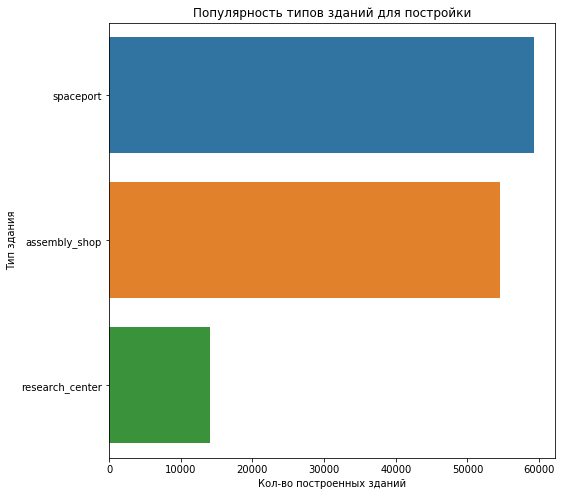

In [20]:
plt.figure(figsize = (8,8))
sns.countplot(y='building_type', data=game_actions, order = game_actions['building_type'].value_counts().index)
plt.title('Популярность типов зданий для постройки')
plt.ylabel('Тип здания')
plt.xlabel('Кол-во построенных зданий')
plt.show()

Узнаем, какое событие происходит чаще всего.

In [21]:
game_actions['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [22]:
gg = game_actions[game_actions['event'] == 'finished_stage_1']
gg['user_id'].value_counts()

ccbc4d2e-7537-43e6-95d4-62382a992914    1
69395cef-d81f-49e0-bc5a-f3ea0cf576c0    1
7ad2f21e-d9ce-413a-9e8b-2154f4523f02    1
f0295077-6728-4f87-98a2-1bfad448745b    1
023981cd-dd80-4062-933a-0ef93902bd3d    1
                                       ..
9c3c77b2-e89e-4741-9736-34f8f3593e36    1
d962b58c-b49b-4908-a71d-377d2a4ddce0    1
c726bac1-0dc8-41b1-aa15-2582406938c1    1
ce6dc590-915f-4890-8b4c-cf3aa8625b38    1
0f973f5f-7ca4-4a95-bfc7-d472e9b18e48    1
Name: user_id, Length: 5817, dtype: int64

Всего 5817 пользователей закончили 1-ый уровень

Рассмотрим распределение совершенных событий пользователями по времени

In [23]:
game_actions['event_datetime'].min()

Timestamp('2020-05-04 00:00:01')

In [24]:
game_actions['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


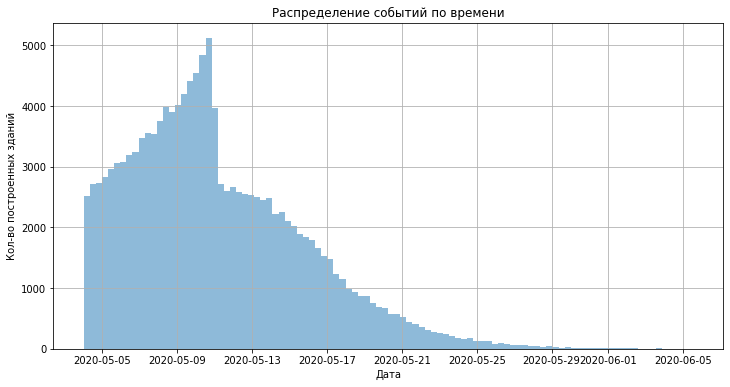

In [25]:
plt.figure(figsize = (12,6))
plt.title('Распределение событий по времени')
plt.ylabel('Кол-во построенных зданий')
plt.xlabel('Дата')
game_actions['event_datetime'].hist(bins = 100, ls='dotted', alpha = 0.5, lw=5)
plt.show()

Можно сделать вывод, что пользователи активно играют в игру, примерно 5 дней, т.к. нам известно, что в данной когорте люди начались пользоваться приложением с 4 мая по 10 мая включительно.

Узнаем, какое условие победы реализовывается чаще для завершения 1-ого уровня.

In [26]:
print('Закончили 1-ый уровень, реализовав проект:', game_actions['project_type'].count())

Закончили 1-ый уровень, реализовав проект: 1866


In [27]:
final = game_actions[game_actions['event'] == 'finished_stage_1']

In [28]:
print('Закончили 1-ый уровень победой над врагом:',
      final['event'].count() - game_actions['project_type'].count())

Закончили 1-ый уровень победой над врагом: 3951


Проанализируем влияние событий на совершение целевого события, пусть целевое событие это проект.

In [29]:
project_done = game_actions[game_actions['event'] == 'project']
project_done

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...,...,...,...
135602,2020-06-02 03:04:42,project,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,2020-06-02 06:21:03,project,NaN,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,2020-06-02 17:17:28,project,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,2020-06-03 09:46:04,project,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [30]:
len(project_done['user_id'].unique())

1866

Рассмотрим активность пользователей, которые завершили проект, след-но прошли 1-ый уровень

In [31]:
users = project_done['user_id'].unique()

In [32]:
gg = game_actions[game_actions['user_id'].isin(users)]
gg

,event_datetime,event,building_type,user_id,project_type
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN
13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN
20,2020-05-04 00:03:46,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN
...,...,...,...,...,...
135620,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN
135627,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135629,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN
135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly


In [33]:
gg['building_type'].value_counts()

spaceport          10788
assembly_shop       9116
research_center     3697
Name: building_type, dtype: int64

In [34]:
building1 = gg['building_type'].unique()

In [35]:
for i in building1:
    print(i,':', len(gg[gg['building_type'] == i]['user_id'].unique()))

assembly_shop : 1866
spaceport : 1866
research_center : 1866
nan : 0


In [36]:
building = game_actions['building_type'].unique()

In [37]:
for i in building:
    print(i,':', len(game_actions[game_actions['building_type'] == i]['user_id'].unique()))

assembly_shop : 13576
spaceport : 13231
nan : 0
research_center : 7671


In [38]:
game_actions.groupby('building_type')['user_id'].nunique()

building_type
assembly_shop      13576
research_center     7671
spaceport          13231
Name: user_id, dtype: int64

Напишем функцию для "конверсии" построек.

In [39]:
def event(game_actions):

    building_type = game_actions.pivot_table(index = 'building_type', values = 'user_id', aggfunc = 'count')\
    .sort_values(by='user_id', ascending=False).reset_index()

    print(building_type)
    print('Суммарное количество пользователей:', len(game_actions['user_id'].unique()))
    name_list = building_type['building_type'].unique()
    a = [] 
    for i in range (len(building)): #количество пользователей
        a.append(len(game_actions[game_actions['building_type'] == building[i]]['user_id'].unique()))
        print('Количество пользователей, которые построили', building[i],':', len(game_actions[game_actions['building_type']
                                                                               == building[i]]['user_id'].unique()))

    for i in range (len(building)): #доля пользователей
        print('Доля пользователей которые построили', building[i],':', round(len(game_actions[game_actions['building_type'] 
                                                                       == building[i]]['user_id'].unique()) /\
                                           len(game_actions['user_id'].unique()) * 100, 2), '%')

In [40]:
event(game_actions)

     building_type  user_id
0        spaceport    59325
1    assembly_shop    54494
2  research_center    14137
Суммарное количество пользователей: 13576
Количество пользователей, которые построили assembly_shop : 13576
Количество пользователей, которые построили spaceport : 13231
Количество пользователей, которые построили nan : 0
Количество пользователей, которые построили research_center : 7671
Доля пользователей которые построили assembly_shop : 100.0 %
Доля пользователей которые построили spaceport : 97.46 %
Доля пользователей которые построили nan : 0.0 %
Доля пользователей которые построили research_center : 56.5 %


Можно сделать вывод, чтобы завершить проект, нужно как минимум построить 1 здание каждого типа.

### Вывод

В данном этапе мы узнали, что всего уникальных пользователей 13576. Чаще всего пользователи строят здание spaceport (59325), рядом с ним assembly_shop (54494) и реже всего research_center (14137). 5817 пользователей закончили успешно 1-ый уровень, причем 3951 пользователь закончил, победив врага, а 1866 пользователей закончили уровень, завершив проект. Также рассмотрели на графике распределение событий по времени и сделали вывод, что пользователи активно играют в игру, примерно 5 дней, т.к. нам известно, что в данной когорте люди начали пользоваться приложением с 4 мая по 10 мая включительно. А также определили, что каждый игрок, который закончил уровень, завершив проект, как минимум построил одно здания каждого типа, а самое популярное здание среди этих пользователей оказался spaceport (10788). Если рассмотривать внедрения рекламы, то каждый пользователь построил хоть раз здание assembly_shop, но чаще всего строился spaceport, только 56.5% пользователей построили research_center. Если мы рассматриваем максимальную прибыль, не учитывая насколько долго останется пользователь в нашем приложении, то логично вставить рекламу для построек assembly_shop и spaceport. Но если опираться на фактор удержания, чтобы игрок успел погрузиться в игру, то можно рекламу оставить для построек research_center, а также рассмотреть частоту показа рекламы, например, для каждого 2-ого spaceport показывать рекламу, чтобы она сильно не надоедала пользователям.

## Работа с данными по маркетингу

Посмотрим, сколько зданий построили пользователи относительно источников, с которых они перешли.

In [41]:
user_source['source'].value_counts()

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

In [42]:
#Соединим две таблицы
data = game_actions.merge(user_source, on = 'user_id')
data

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,facebook_ads
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,youtube_channel_reklama


In [43]:
data.pivot_table(index = 'source', values = 'building_type', aggfunc = 'count')

,building_type
source,
facebook_ads,26131
instagram_new_adverts,31815
yandex_direct,45032
youtube_channel_reklama,24978


Теперь посмотрим на кол-во пользователей, которые завершили 1-ый уровень относительно источников.

In [44]:
data1 = data[data['event'] == 'finished_stage_1']

In [45]:
data1.pivot_table(index = 'source', values = 'event', aggfunc = 'count')

,event
source,
facebook_ads,1150
instagram_new_adverts,1466
yandex_direct,2042
youtube_channel_reklama,1159


Построим графики

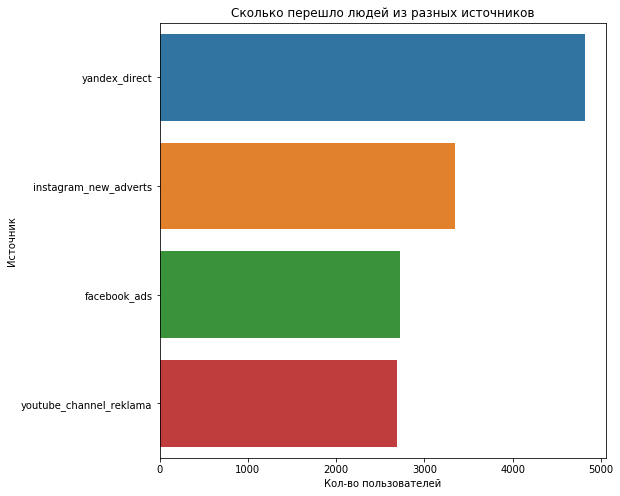

In [46]:
plt.figure(figsize = (8,8))
sns.countplot(y='source', data=user_source, order = user_source['source'].value_counts().index)
plt.title('Сколько перешло людей из разных источников')
plt.ylabel('Источник')
plt.xlabel('Кол-во пользователей')
plt.show()

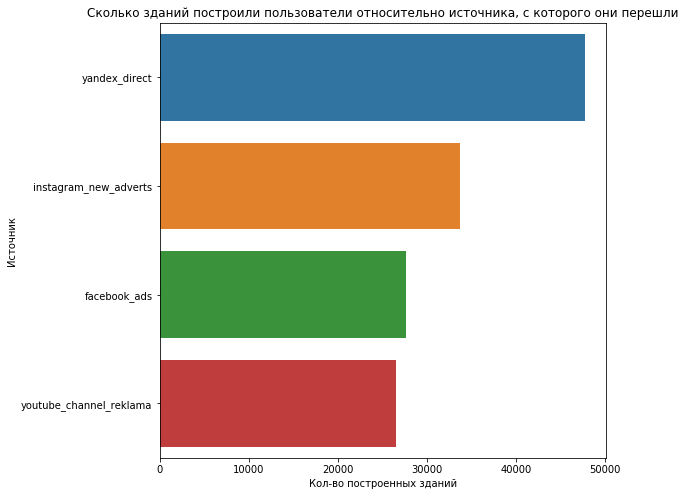

In [47]:
plt.figure(figsize = (8,8))
sns.countplot(y='source', data=data, order = data['source'].value_counts().index)
plt.title('Сколько зданий построили пользователи относительно источника, с которого они перешли')
plt.ylabel('Источник')
plt.xlabel('Кол-во построенных зданий')
plt.show()

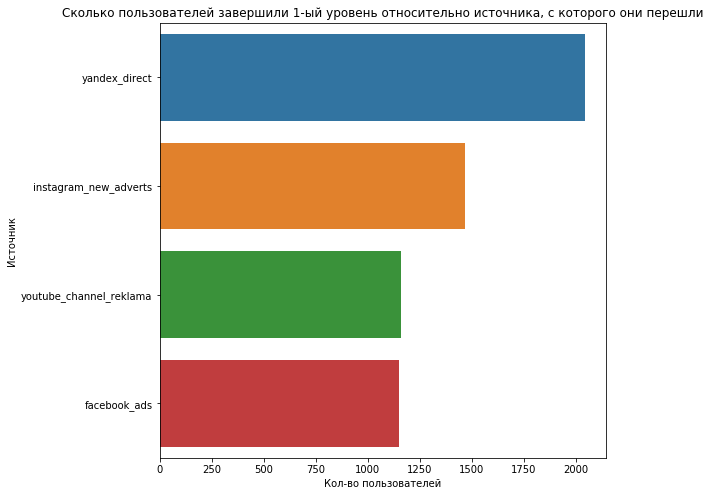

In [48]:
plt.figure(figsize = (8,8))
sns.countplot(y='source', data=data1, order = data1['source'].value_counts().index)
plt.title('Сколько пользователей завершили 1-ый уровень относительно источника, с которого они перешли')
plt.ylabel('Источник')
plt.xlabel('Кол-во пользователей')
plt.show()

Соотношение сохраняется во всех трех случаях, явных изменений не выявлено, действительно, с яндекса перешло больше всего человек, след-но они построили больше всех зданий, а также больше всего из них закончило 1-ый уровень, та же картина и с другими источниками соответственно. Однако, хоть и фейсбук держал планку третьего места по всем параметрам, но людей, закончивших 1-ый уровень больше у ютуба, чем у фейсбука, но разница очень незначительная.

Сколько стоит реклама на разнах источниках?

In [49]:
ad_costs.pivot_table(index = 'source', columns = 'day', values = 'cost', aggfunc = 'sum')

day,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09
source,,,,,,,
facebook_ads,935.882786,548.354480,260.185754,177.982200,111.766796,68.009276,38.723350
instagram_new_adverts,943.204717,502.925451,313.970984,173.071145,109.915254,71.578739,46.775400
yandex_direct,969.139394,554.651494,308.232990,180.917099,114.429338,62.961630,42.779505
youtube_channel_reklama,454.224943,259.073224,147.041741,88.506074,55.740645,40.217907,23.314669


In [50]:
ad_costs.groupby('source')['cost'].sum()

source
facebook_ads               2140.904643
instagram_new_adverts      2161.441691
yandex_direct              2233.111449
youtube_channel_reklama    1068.119204
Name: cost, dtype: float64

In [51]:
ad_costs.groupby('source')['cost'].mean()

source
facebook_ads               305.843520
instagram_new_adverts      308.777384
yandex_direct              319.015921
youtube_channel_reklama    152.588458
Name: cost, dtype: float64

In [52]:
print('Общие затраты на рекламу:', ad_costs['cost'].sum())

Общие затраты на рекламу: 7603.576986788022


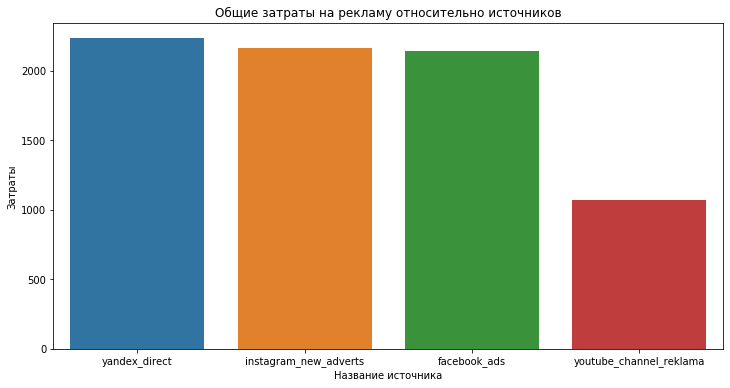

In [53]:
def graphic(ad_costs):
    plt.figure(figsize=(12, 6))
    sns.barplot(data = ad_costs, x='source', y='cost')
    plt.title('Общие затраты на рекламу относительно источников')
    plt.xlabel('Название источника')
    plt.ylabel('Затраты')
    
source_cost = ad_costs.pivot_table(
        index = 'source', values = 'cost', aggfunc = 'sum').reset_index().sort_values(
                                                            by = 'cost', ascending = False)
graphic(source_cost)

Исходя из стоимости кликов, можно понять, когда пришло больше или меньше пользователей. Пик прихода пришел на 3 мая, а далее заметно затухание, причем на всех источниках. Исходя из прошлого шага, можно сделать вывод, что реклама с фейсбука себя не оправдывает, т.к. мы заплатили в два раза больше, чем ютубу, а пользователей пришло практически одинакого и активность у них также очень близкая. Яндекс является фаворитом по всем параметрам. Инстаграм имеет тоже хорошие показатели, относительно затрат и привлечения пользователей.

### Вывод

На данном этапе мы узнали, сколько пришло пользователей из разных источников:

yandex_direct:              4817

nstagram_new_adverts:      3347

facebook_ads:               2726

youtube_channel_reklama:    2686

Соотношение построенных зданий пользователями относительно источником, примерно такое же. Выделили оптимальный источник - яндекс. И сделали вывод, что фейсбук совершенно невыгодный для нас источник, т.к. мы тратим на него, примерно столько же денег как на инстаграм, но приведено пользователей и их активность, сопоставимы с ютубом, на который мы тратим в два раза меньше.

## Проверка статистических гипотез

Проверим гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Воспользуем t-тестом.

Нулевая гипотеза - не наблюдается различие между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Альтернативная гипотеза - наблюдается различие между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

alpha = 0.05

In [54]:
data_final = game_actions.query('event == "finished_stage_1"')
data_final

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135633,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [55]:
data_final_1 = data_final[~data_final['user_id'].isin(users)]

In [56]:
data_final_1

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN
...,...,...,...,...,...
135628,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN
135632,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [57]:
users1 = data_final_1['user_id'].unique()

In [58]:
gg1 = game_actions[game_actions['user_id'].isin(users1)]
gg1 #Таблица пользователей, которые победили врага

,event_datetime,event,building_type,user_id,project_type
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
11,2020-05-04 00:02:24,building,assembly_shop,9c200ece-3b74-44c4-8a3f-260f2486c5d7,NaN
15,2020-05-04 00:03:10,building,assembly_shop,02bf92c2-17a0-4156-be88-2054fb6b7421,NaN
...,...,...,...,...,...
135634,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [59]:
gg #Таблица пользователей, который прошли 1-ый уровень, завершив проект

,event_datetime,event,building_type,user_id,project_type
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN
13,2020-05-04 00:02:56,building,assembly_shop,7b3b6554-7949-4065-9808-d6c79bdc2f58,NaN
20,2020-05-04 00:03:46,building,assembly_shop,b374304d-2f74-4cc1-a4e2-500da44a06c7,NaN
...,...,...,...,...,...
135620,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN
135627,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN
135629,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN
135630,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly


Найдем время 1-ого события и завершения 1-ого уровня у каждого пользователя для каждого условия прохождения

In [60]:
aga = gg1.groupby('user_id')['event_datetime'].min()

In [61]:
aga1 = gg1.groupby('user_id')['event_datetime'].max()

In [62]:
diff = (aga1 - aga).dt.days #затраченно время для пользователей, которые победили врага

<div class="alert alert-danger">
**Комментарий ревьюера:** В данном случае использовать `.dt.seconds` нельзя, так как "the .seconds attribute represents the number of seconds >= 0 and < 1 day" (из документации) и это не отражает реально затраченного времени. Проверку гипотезы нужно переделать.
</div>

Тогда попробуем .dt.days

In [63]:
gag = gg.groupby('user_id')['event_datetime'].min()

In [64]:
gag1 = gg.groupby('user_id')['event_datetime'].max()

In [65]:
diff1 = (gag1 - gag).dt.days #затраченное время для пользователей, завершили проект

In [66]:
alpha=.01
results = st.ttest_ind(diff, diff1, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6237027268062713e-106
Отвергаем нулевую гипотезу


In [67]:
diff1.mean()

12.963022508038586

In [68]:
diff.mean()

10.606175651733738

Действительно, среднее время прохождения 1-ого уровня путем победой над врагом в среднем меньше, чем у победы, которая реализованна через проект.

Проверим гипотезы различия затрат на рекламу между яндексом и инстаграммом

Воспользуем t-тестом.

Нулевая гипотеза - не наблюдается различие затрат на рекламу между яндексом и инстаграммом.

Альтернативная гипотеза - наблюдается различие затрат на рекламу между яндексом и инстаграммом.

alpha = 0.05

In [69]:
yandex = ad_costs.query('source == "yandex_direct"')['cost']
instagram = ad_costs.query('source == "instagram_new_adverts"')['cost']
alpha = .01

results = st.ttest_ind(yandex, instagram, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9546254112573352
Не получилось отвергнуть нулевую гипотезу


In [70]:
yandex.mean()

319.0159213040608

In [71]:
instagram.mean()

308.77738439293205

Действительно, среднее затраты на рекламу для двух источников практически одинаковы.

Рассмотрим два случая: 

Первый случай: Сколько мы покажем рекламы, если после 1-ого просмотра рекламы сразу уходит 1% пользователей.

Второй случай: Сколько мы покажем рекламы, если после того, как каждый пользователь посмотрел рекламу уходит 10% пользователей.

Обозначим нижнюю грань в 1000 пользователей

In [72]:
a = len(game_actions['user_id'].unique())
b = 0
c = 0

In [73]:
while a > 1000:
    b += 1
    a -= 0.01 * a
    print(a) 

13440.24
13305.837599999999
13172.779223999998
13041.051431759997
12910.640917442397
12781.534508267972
12653.719163185293
12527.18197155344
12401.910151837907
12277.891050319527
12155.112139816332
12033.56101841817
11913.225408233988
11794.093154151647
11676.152222610132
11559.39070038403
11443.79679338019
11329.358825446388
11216.065237191924
11103.904584820004
10992.865538971804
10882.936883582086
10774.107514746265
10666.366439598802
10559.702775202813
10454.105747450785
10349.564689976278
10246.069043076515
10143.60835264575
10042.172269119292
9941.750546428098
9842.333040963818
9743.90971055418
9646.470613448639
9550.005907314153
9454.505848241011
9359.960789758601
9266.361181861015
9173.697570042405
9081.960594341981
8991.140988398562
8901.229578514576
8812.21728272943
8724.095109902137
8636.854158803115
8550.485617215083
8464.980761042932
8380.330953432504
8296.527643898178
8213.562367459197
8131.426743784605
8050.112476346759
7969.611351583291
7889.915238067459
7811.0160856867

In [74]:
print('Кол-во рекламы, которые мы покажем, если после каждого показа рекламы будет уходить 1% человек:', b)

Кол-во рекламы, которые мы покажем, если после каждого показа рекламы будет уходить 1% человек: 260


In [75]:
a1 = len(game_actions['user_id'].unique())

In [76]:
while a1 > 1000:
    c += a1
    a1 -= 0.1 * a1
    print(a1)

12218.4
10996.56
9896.903999999999
8907.2136
8016.49224
7214.843016
6493.358714399999
5844.022842959999
5259.620558663999
4733.658502797599
4260.292652517839
3834.2633872660554
3450.83704853945
3105.7533436855047
2795.178009316954
2515.6602083852586
2264.094187546733
2037.6847687920595
1833.9162919128535
1650.5246627215681
1485.4721964494113
1336.9249768044701
1203.232479124023
1082.9092312116206
974.6183080904585


In [77]:
print('Кол-во рекламы, которые мы покажем, если после того, как каждый пользователь посмотрит рекламу уходит 10%:', round(c))

Кол-во рекламы, которые мы покажем, если после того, как каждый пользователь посмотрит рекламу уходит 10%: 126014


Минимальная прибыль с одного просмотра рекламы для двух наших случаев

In [78]:
x = ad_costs['cost'].sum()

In [79]:
print(x / b, x / c)

29.244526872261623 0.060339232416630494


### Вывод

На последнем этапе мы проверили две гипотезы: различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком; различия затрат на рекламу между яндексом и инстаграммом. В обоих случаях мы не отвергнули нулевую гипотезу. А также провели расчеты для показа и стоимости рекламы.

Рассмотрим кол-во рекламы для события building, если после каждого просмотра рекламы будет уходить 1%, а также предположим доход с просмотра, чтобы выйти в 0.

In [80]:
game_b = game_actions[game_actions['event'] == 'building']

In [81]:
game_a = game_b.groupby('user_id')['event'].value_counts().to_frame()

In [82]:
game_a['event'].min()

1

In [83]:
in_ax = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [84]:
for i in in_ax:
    print(i, 'building построили:', (game_a[game_a['event'] >= i].count()).sum())

1 building построили: 13576
2 building построили: 13519
3 building построили: 13241
4 building построили: 12685
5 building построили: 11903
6 building построили: 10912
7 building построили: 9593
8 building построили: 9274
9 building построили: 8431
10 building построили: 7117
11 building построили: 5681
12 building построили: 4319
13 building построили: 3090
14 building построили: 2083
15 building построили: 1270
16 building построили: 715
17 building построили: 354
18 building построили: 138
19 building построили: 45
20 building построили: 10


In [85]:
in_ax1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [86]:
for i in in_ax1:
    print(round((game_a[game_a['event'] >= i].count() - game_a[game_a['event'] >= i].count() * 0.01).sum()))

13384
13109
12558
11784
10803
9497
9181
8347
7046
5624
4276
3059
2062
1257
708
350
137
45
10


In [92]:
summa = 0
for k in [13384,
13109,
12558,
11784,
10803,
9497,
9181,
8347,
7046,
5624,
4276,
3059,
2062,
1257,
708,
350,
137,
45,
10]:
    summa+=k
print("Кол-во показов рекламы:", summa)

Кол-во показов рекламы: 113237


In [91]:
print('Cтоимость одного показа рекламы:', round((x / summa), 4))

Cтоимость одного показа рекламы: 0.0671


In [89]:
x

7603.576986788022

## Основные рекомендации и выводы

Основываясь на исходные данные и результаты нашего исследования, выделим основные выводы и рекомендации. После проведения открытия и преобработки данных, мы рассмотрели сколько всего построено зданий в период с 4 мая по 5 июня 2020 года и получили следующие цифры:

spaceport: 59325

assembly_shop: 54494

research_center: 14137

Также рассмотрели сколько уникальных пользователей строили каждый из типов зданий:

assembly_shop : 13576 (100.0 %)

spaceport : 13231 (97.46 %)

research_center : 7671 (56.5 %)

И рассмотрели график распределения событий по времени, по которому сделали вывод, что основная активность пользователей на данный момент составляет около 5 дней, а далее активность затухает.

Следующим шагом мы рассмотрели данные по затратам относительно размещения нашей рекламы на интернет площадках. Цифры, пришедших пользователей оказались следующими: 

yandex_direct: 4817

nstagram_new_adverts: 3347

facebook_ads: 2726

youtube_channel_reklama: 2686

Далее мы рассмотрели на графиках кол-во построенных зданий и кол-во пользователей, которые закончили 1-ый уровень относительно источника, с которого они установили наше приложение. 

yandex_direct: 45032 (2042)
	
instagram_new_adverts: 31815 (1466)

facebook_ads: 26131 (1150)

youtube_channel_reklama: 24978 (1159)

В целом, картина выглядит правильно, чем больше людей пришло с источника, тем больше они построили зданий, а также больше кол-во тех, кто прошел 1-ый уровень, только по последнему критерию, хоть и на 9 пользователей, ютуб обогнал фейсбук. Далее рассмотрены затраты на рекламу в этих источниках. И как оказалось, что фейсбук совершенно себя не оправдывает, т.к. мы тратим на него около 2-ух тысяч, но показатели максимально близки с ютубом, на который потратили в 2 раза меньше. Яндекс же является самым оптимальным источником пользователей. 

В конце рассмотрены две гипотезы: различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком; различия затрат на рекламу между яндексом и инстаграммом. В первом случае присутствуют статистически значимые отличия, а во 2-ом случае наоборот.

    Рекомендации по внедрению рекламы и прибыли с неё:

- Если рассматривать максимальную прибыль и не обращать на фактор удержания пользователей, то логично запустить её для построек assembly_shop и spaceport, т.к. 1-ое здания построил каждый пользователь из когорты, а 2-ое 97.5% всех пользователей.

- Другой путь, когда более трепетно относимся к нашим пользователям, можно внедрить рекламу для постройки research_center, т.к. её строят меньше всех или настроить частоту показа рекламы для каждого здания, например для assembly_shop показывать рекламу на каждую 2-ую или 3-ую постройку.

- Третий совет по поводу уменьшения затрат: стоит отказаться или уменьшить расходы на рекламу приложения в фейсбуке, а также с целью уменьшении затрат можно перенаправить ресурсы на рекламу в ютубе, т.к. она имеет неплохие показатели прироста пользователей и данная площадка является самой дешевой с точки зрения размещения рекламы.
    
    Сколько мы покажем рекламы и сколько она должна стоить? 
    
Выберем событие building после которого будет показ рекламы, т.е. после постройки каждого здания будет показываться реклама. Мы посчитали, что все пользователи прошли через событие building хоть один раз, а максимально событие building встречается 20 раз  у 10 пользователей. Далее мы вычли процент отвалов пользователей, покажем для 1%. В итоге мы получаем, что примерно кол-во рекламы, которые мы сможем показать - 113237. И т.к. нам известно, что наши расходы равны 7603, то опредяем стоимость одного показа - 0.067, чтобы выйти в 0.